#### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set() # To switch to seaborn defaults, simply call the set() function.
from sklearn.preprocessing import StandardScaler
import math
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the data (features and labels)
data = load_breast_cancer()
dataset = pd.DataFrame(data.data, columns = data.feature_names)
x = dataset[['mean area','mean compactness']]
#y = data.target
#y = np.reshape(y,(569,1))

y = pd.Categorical.from_codes(data.target, data.target_names)
y = pd.get_dummies(y, drop_first=True)

final = np.concatenate([x,y], axis = 1)
final = pd.DataFrame(final, columns=['mean area','mean compactness','benign'])

In [3]:
final

,mean area,mean compactness,benign
0,1001.0,0.27760,0.0
1,1326.0,0.07864,0.0
2,1203.0,0.15990,0.0
3,386.1,0.28390,0.0
4,1297.0,0.13280,0.0
...,...,...,...
564,1479.0,0.11590,0.0
565,1261.0,0.10340,0.0
566,858.1,0.10230,0.0
567,1265.0,0.27700,0.0


In [4]:
# Splitting 25% of the data into train and the rest to the test sets.
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=.25, random_state=0)

In [5]:
# Compiling the KNN model 
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(xtrain, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [6]:
# Predicting the unseen data and quantify the model performance:
ypred = knn.predict(xtest)
print('Prediction accuracy score is: ', accuracy_score(ytest, ypred)*100)

Prediction accuracy score is:  90.20979020979021


#### Visualization of the KNN Performance:

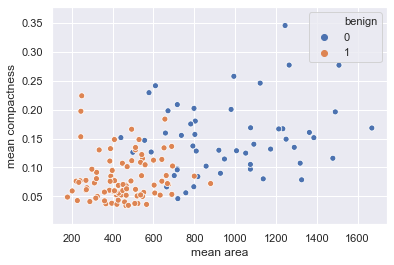

In [7]:
# Scatter plot of the prediction
sns.scatterplot(
x = 'mean area',
y = 'mean compactness',
hue = 'benign',
data = xtest.join(ytest, how = 'outer'))

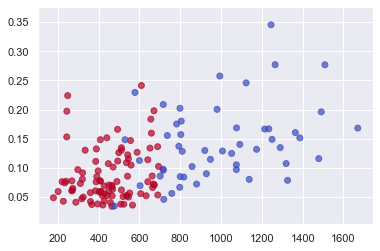

In [8]:
# Scatter plot of the real data
plt.scatter(
xtest['mean area'],
xtest['mean compactness'],
c = ypred,
cmap = 'coolwarm',
alpha = .7)

plt.show()

#### Changing the value of nearest neighbors and find out its effect!

To better understand how the value of nearest neighbor (K) affect the performance and generalization power of the KNN model, we are going to train different KNN models with different K values.

In [9]:
k_val = [1,3,5,7,9,11,15,17]
performance = []

for i in k_val:
    knn = KNeighborsClassifier(n_neighbors=i, metric='euclidean')
    knn.fit(xtrain, ytrain)
    ypred = knn.predict(xtest)
    #performance.append(accuracy_score(ytest,ypred)) 
    performance = accuracy_score(ytest, ypred)
    print('Prediction performance of KNN with K of {} is {}'.format(i, performance))

Prediction performance of KNN with K of 1 is 0.8741258741258742
Prediction performance of KNN with K of 3 is 0.9020979020979021
Prediction performance of KNN with K of 5 is 0.9090909090909091
Prediction performance of KNN with K of 7 is 0.9020979020979021
Prediction performance of KNN with K of 9 is 0.9020979020979021
Prediction performance of KNN with K of 11 is 0.9020979020979021
Prediction performance of KNN with K of 15 is 0.916083916083916
Prediction performance of KNN with K of 17 is 0.9230769230769231


#### Another Example:

We are going to use a real clinical data set (Data1.csv). This data set contain 216 subjects each of which presented with 100 quantified values (clinical Proteomics). Out of all the subjects, 121 are diagnosed as ovarian cancer and 95 are healthy subjects. Therefore, it is binary classification and the class labels are set as -1 and +1.

In [10]:
df = pd.read_csv('Data1.csv', header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,0.518304,0.362863,0.215489,0.587237,0.133816,0.311977,0.454623,0.162456,1.283642,1.503637,...,0.347514,0.101693,0.813038,0.058370,0.104120,1.839021,0.178631,0.097148,0.084328,-1
1,0.153825,0.174490,0.176894,0.173388,0.070989,0.330149,0.429088,0.186806,0.957493,1.177661,...,0.734020,0.396678,0.963417,0.146514,0.051885,1.362960,0.052934,0.094929,0.048630,1
2,0.593878,0.556924,0.495074,0.641608,0.389146,0.523559,0.670289,0.358395,2.039803,2.393783,...,0.057996,0.048082,1.386617,0.057553,0.204713,0.404772,0.049570,0.215242,0.184210,-1
3,0.212857,0.239148,0.122009,0.200013,-0.013684,0.210191,0.300114,0.119804,0.813005,0.967250,...,1.286684,0.315834,0.506502,0.281564,0.087943,3.693671,0.229578,0.057727,0.063700,1
4,0.727784,0.654825,0.554591,0.794625,0.481807,0.972329,1.269925,0.588862,3.296050,3.951254,...,0.043550,0.055165,1.753717,0.038483,0.295754,0.156519,0.032730,0.563517,0.285718,-1


In [11]:
print(df.shape)
df.describe()

(216, 101)


,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
count,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,...,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000
mean,0.495942,0.407847,0.317057,0.564301,0.235266,0.422826,0.547041,0.301258,1.567330,1.841413,...,0.542685,0.178083,1.059568,0.115731,0.139606,1.348066,0.133367,0.186207,0.187599,0.120370
std,0.190439,0.172613,0.148473,0.198416,0.127629,0.189102,0.243215,0.139054,0.670407,0.777485,...,0.613235,0.165384,0.444431,0.068474,0.056948,0.858016,0.079016,0.105158,0.099025,0.995035
min,0.067027,0.064443,-0.017628,0.090615,-0.077556,0.056703,0.075666,-0.011657,0.276156,0.344528,...,0.015783,-0.016119,0.145160,0.007667,0.017725,0.097251,-0.022007,0.008624,-0.049841,-1.000000
25%,0.348899,0.278178,0.194970,0.412666,0.126223,0.267399,0.343204,0.191445,1.065823,1.244210,...,0.094687,0.049238,0.733665,0.061862,0.099408,0.680699,0.072372,0.103478,0.110770,-1.000000
50%,0.487457,0.394124,0.313276,0.573940,0.224877,0.429273,0.546402,0.292750,1.535861,1.807276,...,0.303470,0.115019,1.042124,0.105447,0.130464,1.256514,0.118307,0.170441,0.178351,1.000000
75%,0.630714,0.538824,0.426234,0.701706,0.330112,0.553992,0.718701,0.399565,2.017393,2.394380,...,0.797473,0.259424,1.409359,0.158389,0.181445,1.790585,0.195699,0.256414,0.259957,1.000000
max,0.965799,0.818776,0.674741,1.058306,0.545024,0.972329,1.269925,0.660917,3.563053,4.006428,...,3.921007,0.962498,2.030632,0.340026,0.300613,4.248658,0.348702,0.594699,0.440343,1.000000


In [12]:
# Set the first 100 columns as input data
x = df.iloc[:, :-1]

# Set the last column as targets
y = df.iloc[:, -1]

# spliting the data into train and test sets randomly.
xtrain, xtest, ytrain, ytest = train_test_split(x,y, random_state=1, test_size=.2)

In [13]:
k_val = [1,3,5,7,9,11,13,15,17]

for i in k_val:
    knn = KNeighborsClassifier(n_neighbors=i, metric='euclidean')
    knn.fit(xtrain, ytrain)
    ypred = knn.predict(xtest)
    performance = accuracy_score(ytest, ypred)
    print('Prediction performance of KNN with K of {} is {}'.format(i, performance))

Prediction performance of KNN with K of 1 is 0.9090909090909091
Prediction performance of KNN with K of 3 is 0.9318181818181818
Prediction performance of KNN with K of 5 is 0.9318181818181818
Prediction performance of KNN with K of 7 is 0.9318181818181818
Prediction performance of KNN with K of 9 is 0.8636363636363636
Prediction performance of KNN with K of 11 is 0.8863636363636364
Prediction performance of KNN with K of 13 is 0.8863636363636364
Prediction performance of KNN with K of 15 is 0.8636363636363636
Prediction performance of KNN with K of 17 is 0.8636363636363636


#### How to improve KNN?

For better results, normalizing data on the same scale is highly recommended. Generally, the normalization range considered between 0 and 1. KNN is not suitable for the large dimensional data. In such cases, dimension needs to reduce to improve the performance. Also, handling missing values will help us in improving results.

In [14]:
standsc = StandardScaler()
xtrain = standsc.fit_transform(xtrain)
xtest = standsc.transform(xtest)

In [15]:
k_val = [1,3,5,7,9,11,13,15,17]

for i in k_val:
    knn = KNeighborsClassifier(n_neighbors=i, metric='euclidean')
    knn.fit(xtrain, ytrain)
    ypred = knn.predict(xtest)
    performance = accuracy_score(ytest, ypred)
    print('Prediction performance of KNN with K of {} is {}'.format(i, performance))

Prediction performance of KNN with K of 1 is 0.9318181818181818
Prediction performance of KNN with K of 3 is 0.9318181818181818
Prediction performance of KNN with K of 5 is 0.9545454545454546
Prediction performance of KNN with K of 7 is 0.9545454545454546
Prediction performance of KNN with K of 9 is 0.9545454545454546
Prediction performance of KNN with K of 11 is 0.9545454545454546
Prediction performance of KNN with K of 13 is 0.9772727272727273
Prediction performance of KNN with K of 15 is 0.9772727272727273
Prediction performance of KNN with K of 17 is 0.9772727272727273


#### How to choose the factor k?

In [16]:
# Compute the sqrt
math.sqrt(len(ytest))

6.6332495807108

Odd value of K is selected to avoid confusion between two classes of data. Computing the best value of K we avoid the for loop that we created above. In this example we can use either 5 or 7. 

In [17]:
# Evaluate the model
cm = confusion_matrix(ytest, ypred)
cm

array([[20,  1],
       [ 0, 23]], dtype=int64)

The confusion matrix shows us that the algorithm predicted 20 true values and the actual true values are 23. On the other hand there is 1 predicted false value and none actual false value. 